In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
def replace_Bad_Year(value):
    if len(value) < 4:
        return '1700'
    else:
        return value
    
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [48]:
#--------------------------------------------------------
#--  Input File 3:  title.basics.tsv
#--------------------------------------------------------
print('Reading title.basics.tsv')
titleBasics = pd.read_csv("./Data/title.basics.tsv/data.tsv", sep='\t',dtype={"tconst": object, "titleType": object, "primaryTitle": object, "originalTitle": object, "isAdult": object, "startYear": object})
print('Complete - 3 of 7')
titleBasics = titleBasics[(titleBasics.isAdult == "0") & (titleBasics.titleType == 'movie')]
print('cleanup of startYear')
titleBasics['startYear'] = titleBasics.apply(lambda x: replace_Bad_Year(x['startYear']), axis=1)
titleBasics['startYear']= titleBasics.startYear.astype(int)
print(titleBasics.head(5))

Reading title.basics.tsv
Complete - 3 of 7
cleanup of startYear
        tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
332  tt0000335     movie          Soldiers of the Cross   
499  tt0000502     movie                       Bohemios   
571  tt0000574     movie    The Story of the Kelly Gang   

                     originalTitle isAdult  startYear endYear runtimeMinutes  \
8                       Miss Jerry       0       1894      \N             45   
145  The Corbett-Fitzsimmons Fight       0       1897      \N             20   
332          Soldiers of the Cross       0       1900      \N             \N   
499                       Bohemios       0       1905      \N            100   
571    The Story of the Kelly Gang       0       1906      \N             70   

                     genres  
8                   Romance  
145  Documentary,News,Sport  
332       

In [49]:
#--------------------------------------------------------
#--  Input File 7:  title.ratings.tsv
#--------------------------------------------------------
print('Reading title.ratings.tsv')
titleRatings = pd.read_csv("./Data/title.ratings.tsv/data.tsv", sep='\t',dtype={"tconst": object, "averageRating": float, "numVotes": int})
print('Complete - 7 of 7')
titleRatings.numVotes.astype(int)
print('mean: ',titleRatings.numVotes.mean())
print('mode: ',titleRatings.numVotes.mode())
print('max: ',titleRatings.numVotes.max())
cut_points = [150,978,25000,100000,200000,400000,800000,1000000]
labels = ["low","medium","high","very high","100000","200000","400000","800000","HUGE"]
titleRatings["myVoteVolume"] = binning(titleRatings["numVotes"], cut_points, labels)

print(titleRatings.head(5))


Reading title.ratings.tsv
Complete - 7 of 7
mean:  978.3574526334341
mode:  0    5
dtype: int32
max:  1971974
      tconst  averageRating  numVotes myVoteVolume
0  tt0000001            5.8      1389         high
1  tt0000002            6.5       163       medium
2  tt0000003            6.6       978       medium
3  tt0000004            6.4        98          low
4  tt0000005            6.2      1671         high


In [60]:
myData = pd.merge(titleRatings, titleBasics, left_on = 'tconst', right_on = 'tconst', how='inner')
myData.corr().to_csv('myData_corr.csv')

myData_all = myData
pivot_all = myData_all.pivot_table(index=[myData1.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)



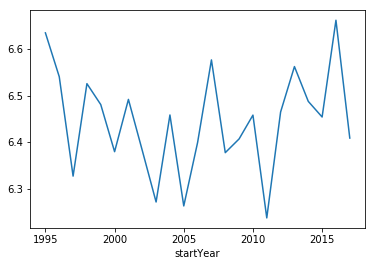

In [61]:
pivot_all['averageRating'].plot(kind='line')

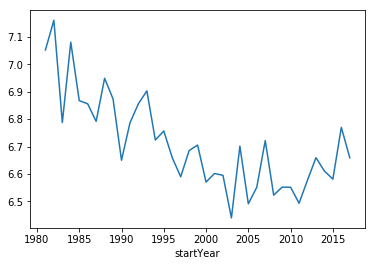

In [52]:
myData = myData[(myData.startYear > 1980) & (myData.startYear < 2018)]
pivot1980 = myData.pivot_table(index=[myData1.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)

pivot1980 
pivot1980['averageRating'].plot(kind='line')

In [53]:
pivot1980.averageRating.mean()

6.713042015579916

In [54]:
myData = myData[(myData.startYear > 1994) & (myData.startYear < 2018)]
pivot1995 = myData.pivot_table(index=[myData1.startYear],
                              values=["averageRating"],
                              aggfunc = pd.np.mean,
                              fill_value = 0)
pivot1995

,averageRating
startYear,
1995.0,6.756790
1996.0,6.659494
1997.0,6.589655
1998.0,6.685294
1999.0,6.705319
2000.0,6.570297
2001.0,6.601626
2002.0,6.594928
2003.0,6.439552


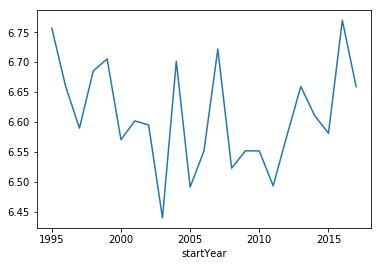

In [55]:
pivot1995['averageRating'].plot(kind='line')

In [56]:
#pivot.averageRating.mean()
pivot1995.averageRating.mean()

6.610642713411648

In [64]:
#myData1 = myData[(myData.myVoteVolume == 'blockbuster') | (myData.myVoteVolume == 'very high')]
myDataNumVotes['100000'] myData_all[myData.numVotes > 100000]
myData.describe()

#myData2.corr().to_csv('myData_corr.csv')


,averageRating,numVotes,startYear
averageRating,1.000000,0.601728,-0.488881
numVotes,0.601728,1.000000,-0.158000
startYear,-0.488881,-0.158000,1.000000


In [65]:
myData2.corr()

,averageRating,numVotes,startYear
averageRating,1.000000,0.601728,-0.488881
numVotes,0.601728,1.000000,-0.158000
startYear,-0.488881,-0.158000,1.000000


<h1>Genre</h2>

In [66]:
myGenreData = pd.merge(titleRatings, titleBasics, left_on = 'tconst', right_on = 'tconst', how='inner')
myGenreData = myGenreData[myGenreData.startYear > 1994]
myGenreData.head(10)

,tconst,averageRating,numVotes,myVoteVolume,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11701,tt0035423,6.4,71429,very high,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance"
32747,tt0066853,5.9,31,low,movie,Na Boca da Noite,Na Boca da Noite,0,2016,\N,68,Drama
45609,tt0088751,5.8,178,medium,movie,The Naked Monster,The Naked Monster,0,2005,\N,100,"Comedy,Horror,Sci-Fi"
48089,tt0093061,7.7,11,low,movie,Funkytown,Funkytown,0,1998,\N,82,"Documentary,Music"
49120,tt0094859,7.8,55,low,movie,Chief Zabu,Chief Zabu,0,2016,\N,74,Comedy
49421,tt0095335,5.5,6,low,movie,The Vengeance,Hu dan qiao jia ren,0,1995,\N,\N,Drama
49854,tt0096056,6.3,578,medium,movie,Crime and Punishment,Crime and Punishment,0,2002,\N,126,Drama
50641,tt0097540,7.4,5,low,movie,Responso,Responso,0,2004,\N,81,\N
51917,tt0099840,5.6,8,low,movie,In the Shadow of the Sandcastle,In the Shadow of the Sandcastle,0,1996,\N,79,"Crime,Drama"
52115,tt0100190,6.3,7,low,movie,Notti di paura,Notti di paura,0,1997,\N,95,\N


In [67]:
def strType(var):
    try:
        if int(var) == float(var):
            return 'int'
    except:
        try:
            float(var)
            return 'float'
        except:
            return 'str'

def find_Value(value, subString):
    if strType(value) == 'str':
        if subString in value:
            return True
        else:
            return False
    else:
        return False


In [68]:
print('calculating genre categories')
print('finding Action')
myGenreData['Action'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Action'), axis=1)
print('finding Adventure')
myGenreData['Adventure'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Adventure'), axis=1)
print('finding Animation')
myGenreData['Animation'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Animation'), axis=1)
print('finding Biography')
myGenreData['Biography'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Biography'), axis=1)
print('finding Comedy')
myGenreData['Comedy'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Comedy'), axis=1)
print('finding Drama')
myGenreData['Drama'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Drama'), axis=1)
print('finding Crime')
myGenreData['Crime'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Crime'), axis=1)
print('finding Family')
myGenreData['Family'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Family'), axis=1)
print('finding History')
myGenreData['History'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'History'), axis=1)
print('finding Horror')
myGenreData['Horror'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Horror'), axis=1)
print('finding Music')
myGenreData['Music'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Music'), axis=1)
print('finding Mystery')
myGenreData['Mystery'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Mystery'), axis=1)
print('finding Romance')
myGenreData['Romance'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Romance'), axis=1)
print('finding Sci-Fi')
myGenreData['Sci-Fi'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Sci-Fi'), axis=1)
print('finding Thriller')
myGenreData['Thriller'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Thriller'), axis=1)
print('finding War')
myGenreData['War'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'War'), axis=1)
print('finding Western')
myGenreData['Western'] = myGenreData.apply(lambda x: find_Value(x['genres'], 'Western'), axis=1)


calculating genre categories
finding Action
finding Adventure
finding Animation
finding Biography
finding Comedy
finding Drama
finding Crime
finding Family
finding History
finding Horror
finding Music
finding Mystery
finding Romance
finding Sci-Fi
finding Thriller
finding War
finding Western


In [69]:
print(myGenreData.head(10))

          tconst  averageRating  numVotes myVoteVolume titleType  \
11701  tt0035423            6.4     71429    very high     movie   
32747  tt0066853            5.9        31          low     movie   
45609  tt0088751            5.8       178       medium     movie   
48089  tt0093061            7.7        11          low     movie   
49120  tt0094859            7.8        55          low     movie   
49421  tt0095335            5.5         6          low     movie   
49854  tt0096056            6.3       578       medium     movie   
50641  tt0097540            7.4         5          low     movie   
51917  tt0099840            5.6         8          low     movie   
52115  tt0100190            6.3         7          low     movie   

                          primaryTitle                    originalTitle  \
11701                   Kate & Leopold                   Kate & Leopold   
32747                 Na Boca da Noite                 Na Boca da Noite   
45609                The N

In [129]:
myGenreAvg = pd.DataFrame(columns = ["genre","averageRating", "max", "min","count","stdDev","numVotes"])

#Action
myGenreData_temp = myGenreData[myGenreData['Action'] == True]
myGenreAvg.loc[0] = ["Action",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Animation
myGenreData_temp = myGenreData[myGenreData['Animation'] == True]
myGenreAvg.loc[1] = ["Animation",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Biography
myGenreData_temp = myGenreData[myGenreData['Biography'] == True]
myGenreAvg.loc[2] = ["Biography",myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Comedy
myGenreData_temp = myGenreData[myGenreData['Comedy'] == True]
myGenreAvg.loc[3] = ['Comedy', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Drama
myGenreData_temp = myGenreData[myGenreData['Drama'] == True]
myGenreAvg.loc[4] = ['Drama', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Crime
myGenreData_temp = myGenreData[myGenreData['Crime'] == True]
myGenreAvg.loc[5] = ['Crime', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Family
myGenreData_temp = myGenreData[myGenreData['Family'] == True]
myGenreAvg.loc[6] = ['Family', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#History
myGenreData_temp = myGenreData[myGenreData['History'] == True]
myGenreAvg.loc[7] = ['History', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Horror
myGenreData_temp = myGenreData[myGenreData['Horror'] == True]
myGenreAvg.loc[8] = ['Horror', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Music
myGenreData_temp = myGenreData[myGenreData['Music'] == True]
myGenreAvg.loc[9] = ['Music', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Mystery
myGenreData_temp = myGenreData[myGenreData['Mystery'] == True]
myGenreAvg.loc[10] = ['Mystery', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Romance
myGenreData_temp = myGenreData[myGenreData['Romance'] == True]
myGenreAvg.loc[11] = ['Romance', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Sci-Fi
myGenreData_temp = myGenreData[myGenreData['Sci-Fi'] == True]
myGenreAvg.loc[12] = ['Sci-Fi', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Thriller
myGenreData_temp = myGenreData[myGenreData['Thriller'] == True]
myGenreAvg.loc[13] = ['Thriller', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#War
myGenreData_temp = myGenreData[myGenreData['War'] == True]
myGenreAvg.loc[14] = ['War', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index

#Western
myGenreData_temp = myGenreData[myGenreData['Western'] == True]
myGenreAvg.loc[15] = ['Western', myGenreData_temp.averageRating.mean(),myGenreData_temp.averageRating.max(), myGenreData_temp.averageRating.min(),myGenreData_temp.averageRating.count(),myGenreData_temp.averageRating.std(ddof=1),myGenreData_temp.numVotes.mean()]  # adding a row
#myGenreAvg.index = myGenreAvg.index + 1  # shifting index


myGenreAvg = myGenreAvg.sort_values(by=['averageRating'], ascending=False)
myGenreAvg


,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.174818,10.0,1.0,4666,1.071895,7248.204886
7,History,7.054990,10.0,1.1,3497,1.158741,4908.077495
9,Music,6.830394,10.0,1.0,4343,1.399909,3152.718397
14,War,6.706594,10.0,1.2,1562,1.260528,5954.165813
4,Drama,6.369456,10.0,1.0,51339,1.240651,5031.572567
1,Animation,6.319663,9.4,1.1,2614,1.245730,12489.419281
6,Family,6.259968,10.0,1.0,4971,1.411790,4969.886542
11,Romance,6.135274,9.8,1.0,12573,1.213004,5710.281158
5,Crime,6.096774,10.0,1.1,8463,1.302512,11992.004608
3,Comedy,5.995882,10.0,1.0,29769,1.366448,5343.965770


In [132]:
myGenreAvg = myGenreAvg.sort_values(by=['stdDev'], ascending=True)
myGenreAvg

,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.174818,10.0,1.0,4666,1.071895,7248.204886
7,History,7.054990,10.0,1.1,3497,1.158741,4908.077495
11,Romance,6.135274,9.8,1.0,12573,1.213004,5710.281158
4,Drama,6.369456,10.0,1.0,51339,1.240651,5031.572567
1,Animation,6.319663,9.4,1.1,2614,1.245730,12489.419281
14,War,6.706594,10.0,1.2,1562,1.260528,5954.165813
5,Crime,6.096774,10.0,1.1,8463,1.302512,11992.004608
10,Mystery,5.964830,9.4,1.0,4538,1.347461,12351.440502
3,Comedy,5.995882,10.0,1.0,29769,1.366448,5343.965770
9,Music,6.830394,10.0,1.0,4343,1.399909,3152.718397


In [133]:
myTargetGenre = myGenreAvg[myGenreAvg.averageRating >= myGenreAvg.averageRating.mean()]
myTargetGenre

,genre,averageRating,max,min,count,stdDev,numVotes
2,Biography,7.174818,10.0,1.0,4666,1.071895,7248.204886
7,History,7.054990,10.0,1.1,3497,1.158741,4908.077495
4,Drama,6.369456,10.0,1.0,51339,1.240651,5031.572567
1,Animation,6.319663,9.4,1.1,2614,1.245730,12489.419281
14,War,6.706594,10.0,1.2,1562,1.260528,5954.165813
9,Music,6.830394,10.0,1.0,4343,1.399909,3152.718397
6,Family,6.259968,10.0,1.0,4971,1.411790,4969.886542


In [126]:
myTargetGenre = myGenreAvg[myGenreAvg.stdDev <= myGenreAvg.stdDev.mean()]
myTargetGenre

,genre,averageRating,max,min,count,stdDev
2,Biography,7.174818,10.0,1.0,4666,1.071895
7,History,7.054990,10.0,1.1,3497,1.158741
11,Romance,6.135274,9.8,1.0,12573,1.213004
4,Drama,6.369456,10.0,1.0,51339,1.240651
1,Animation,6.319663,9.4,1.1,2614,1.245730
14,War,6.706594,10.0,1.2,1562,1.260528
5,Crime,6.096774,10.0,1.1,8463,1.302512


In [131]:
myTargetGenre = myGenreAvg[myGenreAvg.numVotes >= myGenreAvg.numVotes.mean()]
myTargetGenre

,genre,averageRating,max,min,count,stdDev,numVotes
1,Animation,6.319663,9.4,1.1,2614,1.245730,12489.419281
5,Crime,6.096774,10.0,1.1,8463,1.302512,11992.004608
10,Mystery,5.964830,9.4,1.0,4538,1.347461,12351.440502
0,Action,5.720838,9.6,1.0,11815,1.489175,14591.925603
12,Sci-Fi,5.411843,10.0,1.0,3369,1.516369,21891.333037
